In [378]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np

In [379]:
sns.set_theme(style="darkgrid")
fmri = sns.load_dataset("fmri")
print(fmri)


     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


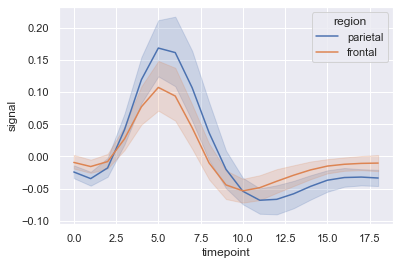

In [380]:

sns.lineplot(x="timepoint", y="signal", hue="region", data=fmri)
#sns.lineplot(x="complexity", y="samples", hue="algorithm", data=fmri)
plt.show()

In [381]:
df = pd.read_csv("evaluation/maze_sample_reward_gesamt.csv", index_col=False)


print(df)

      complexity algorithm  samples    reward  b
0             12    LaMCTS        6  2.000000  8
1             12    LaMCTS       12  2.000000  8
2             12    LaMCTS       18  2.000000  8
3             12    LaMCTS       24  2.000000  8
4             12    LaMCTS       30  2.000000  8
...          ...       ...      ...       ... ..
4714          36        A*       62  0.341593  8
4715          36        A*       63  0.284325  8
4716          36        A*       64  0.416305  8
4717          36        A*       65  0.369358  8
4718          36        A*       66  0.305281  8

[4719 rows x 5 columns]


In [382]:
#df = df[df.algorithm != 'LAP3']
df = df[df.algorithm != 'LaMCTS']
df = df[df.algorithm != 'A*']
print(df)

      complexity algorithm  samples  reward  b
11            12      LAP3       65    10.0  8
12            12      LAP3       65    10.0  8
13            12      LAP3       65     6.0  8
14            12      LAP3       65     7.0  8
15            12      LAP3       65     8.0  8
...          ...       ...      ...     ... ..
4648          36      LAP3       45     1.0  8
4649          36      LAP3       50    10.0  8
4650          36      LAP3       55     2.0  8
4651          36      LAP3       60     3.0  8
4652          36      LAP3       65     4.0  8

[1847 rows x 5 columns]


<AxesSubplot: xlabel='samples', ylabel='reward'>

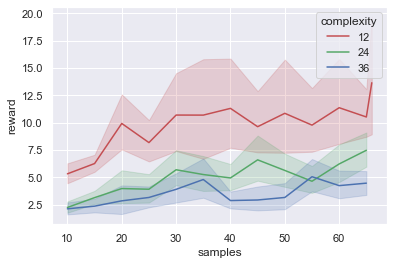

In [383]:
sns.lineplot(x="samples", y="reward",hue="complexity",data=df, palette=['r', 'g', "b"])

In [384]:
def calculate_mean_std(samples, reward):
    # Initialize variables
    total_reward = 0
    total_samples = 0

    # Iterate over each row in the CSV file
    for i in range(len(reward)):

        # Update the total reward and total samples
        total_reward = total_reward+ reward.iloc[i]
        total_samples =total_samples+1

    # Calculate the mean and standard deviation
    mean_reward = total_reward/total_samples #total_reward / total_samples


    return mean_reward, 2.25

In [385]:
mean_list = []
sample_list = []

for i in range(6,72,6):
    
    df_20 = df[df.samples == i]
    samples = df_20["samples"]
    reward = df_20["reward"]

    #mean_reward, std_deviation = calculate_mean_std(samples, reward)
    mean_reward = sum(reward)/len(reward)
    mean_list.append(mean_reward)
    sample_list.append(i)
    print("samples: ", i)
    print("Mean reward:", round(mean_reward,4))


print("mean of mean", round((sum(mean_list)/11),4))



ZeroDivisionError: division by zero

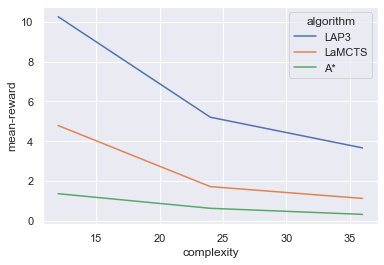

In [ ]:
sample_list = ["12","24","36"]
astar_mean_list = ["1.3529","0.6181","0.3129"]
lamcts_mean_list = ["4.7844", "1.71","1.1155"]

lap3_mean_list = ["10.2632","5.2030","3.6588"]

df_test = pd.read_csv("evaluation/test.csv")
#sns.lineplot(x="timepoint", y="signal", hue="region", data=fmri)
sns.lineplot(x="complexity", y="mean-reward",hue="algorithm",data=df_test)
plt.show()